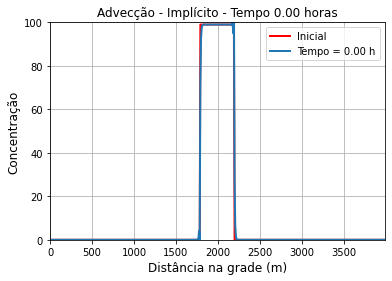

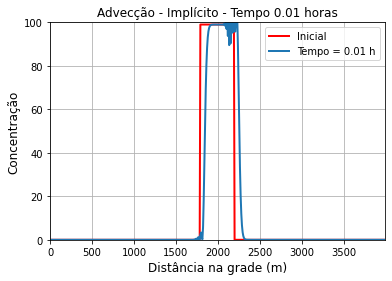

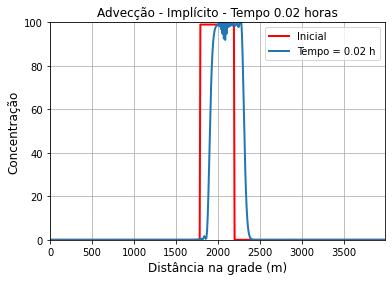

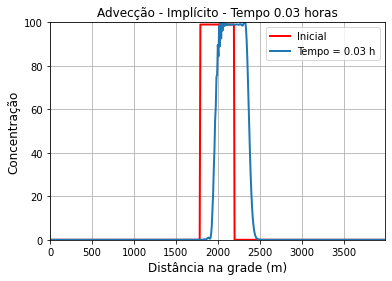

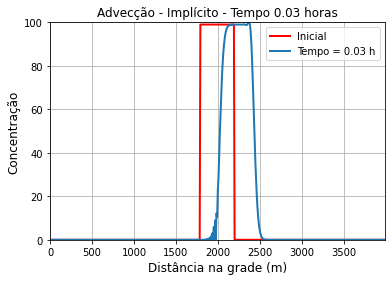

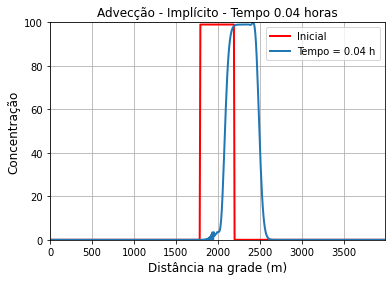

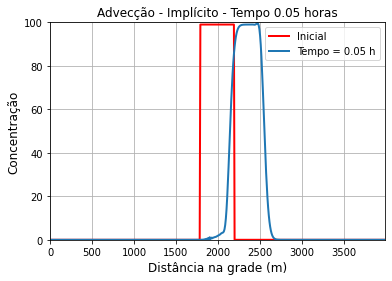

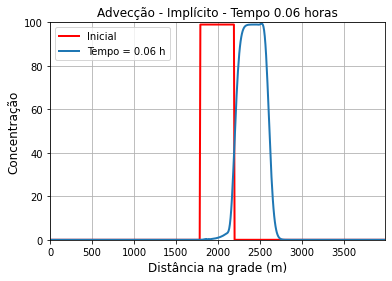

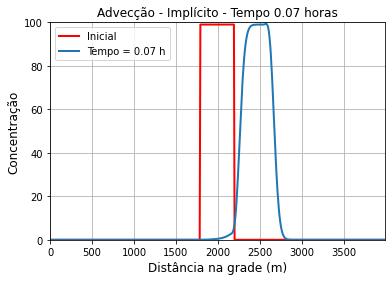

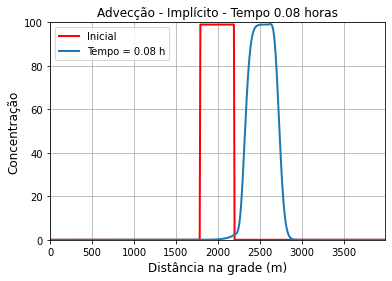

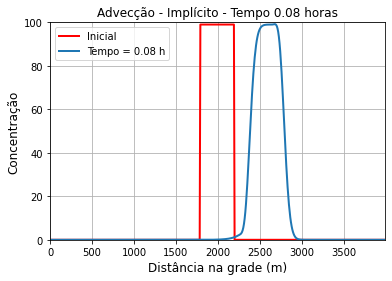

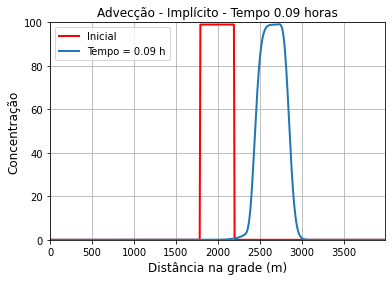

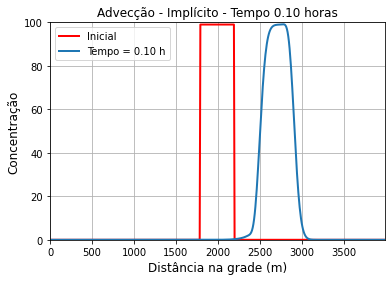

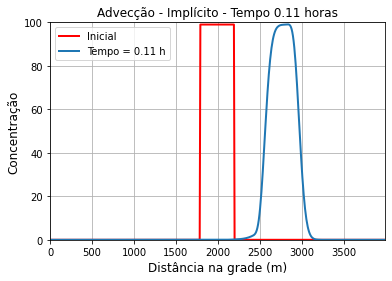

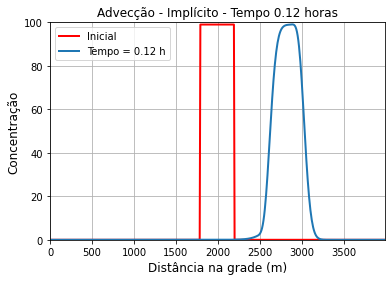

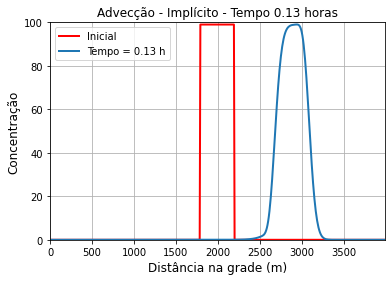

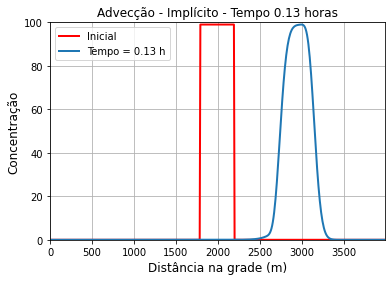

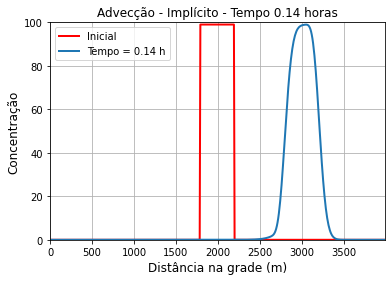

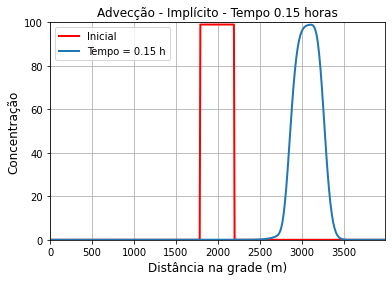

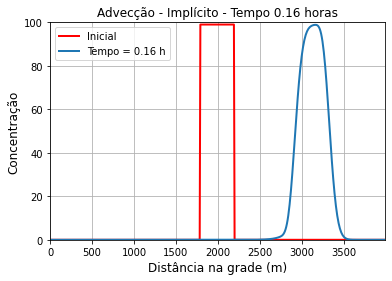

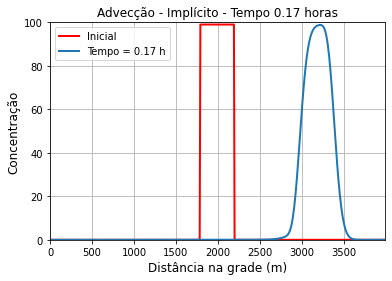

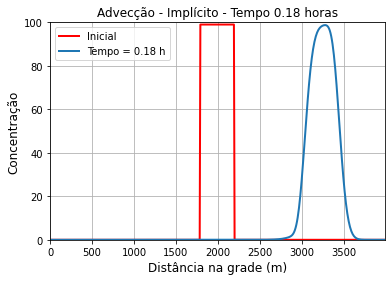

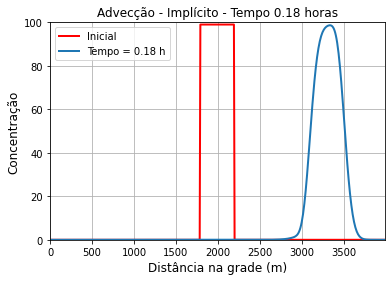

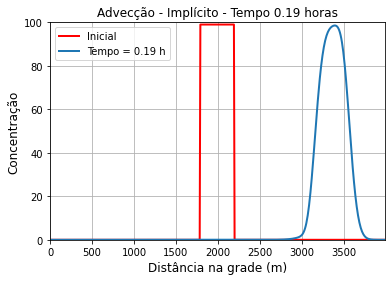

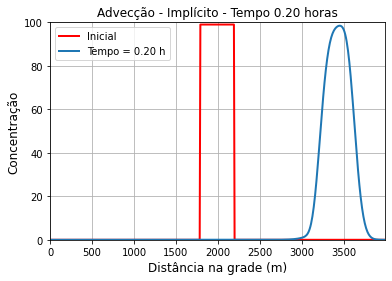

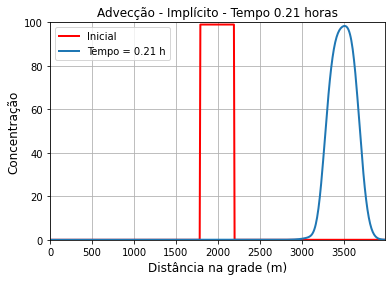

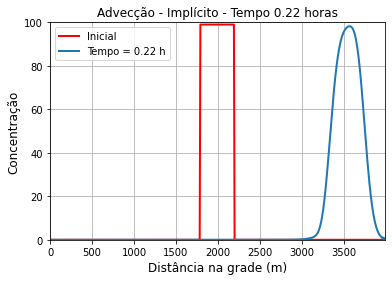

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros iniciais
jmax = 500  # número de pontos de grade
nmax = 792  # número de passos de tempo

# Condição inicial
fatu = np.zeros(jmax)
fatu[224:275] = 99  # Sinal retangular (índice adaptado para Python, 0-indexed)
fcin = fatu.copy()

c = 2    # Velocidade em m/s
dt = 1   # Tempo em s
dx = 8   # Espaçamento da grade em m
xgrid = np.arange(jmax) * dx

# Esquema implícito centrado no tempo e centrado no espaço
fant = fatu.copy()
fren = fatu.copy()
freqplot = 30
kplot = 29

# Coeficientes para o método implícito
sj = np.zeros(jmax)
pj = np.zeros(jmax)
dj = np.zeros(jmax)

aj = -c / (2 * dx)
bj = 1 / (2 * dt)
cj = +c / (2 * dx)

# Loop no tempo
for n in range(2, nmax):
    tempo = n * dt
    kplot += 1
    
    # Termo fonte
    dj = fant / (2 * dt)
    
    # Varredura ascendente
    for j in range(1, jmax - 1):
        sj[j] = -cj / (bj + aj * sj[j - 1])
        pj[j] = (dj[j] - aj * pj[j - 1]) / (bj + aj * sj[j - 1])
    
    # Varredura descendente
    for j in range(jmax - 2, 0, -1):
        fren[j] = sj[j] * fren[j + 1] + pj[j]
    
    fren[fren < 0] = 0  # Garantir que valores negativos sejam truncados a zero
    
    # Plotar os resultados a cada freqplot passos
    if kplot == freqplot:
        kplot = 0
        plt.figure(1)
        plt.plot(xgrid, fcin, 'r', label='Inicial', linewidth=2)
        plt.plot(xgrid, fren, label=f'Tempo = {tempo / 3600:.2f} h', linewidth=2)
        plt.grid(True)
        plt.axis([xgrid[0], xgrid[-1], 0, 100])
        plt.title(f'Advecção - Implícito - Tempo {tempo / 3600:.2f} horas', fontsize=12)
        plt.xlabel('Distância na grade (m)', fontsize=12)
        plt.ylabel('Concentração', fontsize=12)
        plt.legend()
        plt.show()
        plt.pause(0.5)
    
    # Atualizar as variáveis no tempo
    fant = fatu.copy()
    fatu = fren.copy()